This tutorial trains a neural network model to classify images of clothing, such as sneakers and shirts

This tutorial uses the Fashion MNIST dataset , which contains 70,000 grayscale images in 10 categories. The images show individual clothing items at low resolution (28 by 28 pixels) as shown here:

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Images are 28x28 NumPy arrays with pixel values ranging from 0 to 255. Labels are an array of integers ranging from 0 to 9. They correspond to the class of garment that the image represents:

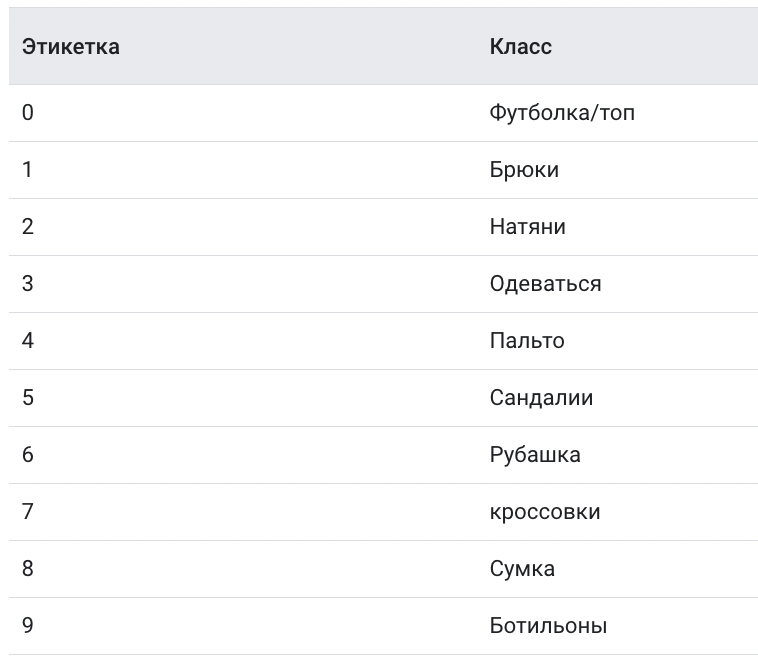

Each image is mapped to one label. Since class names are not included in the dataset, save them here to use later when building images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **Explore the data**

Let's explore the format of the dataset before training the model. The following shows that there are 60,000 images in the training set, each represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

Each label represents an integer from 0 to 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# **Pre-process the data**

The data must be preprocessed before training the network. If you look at the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

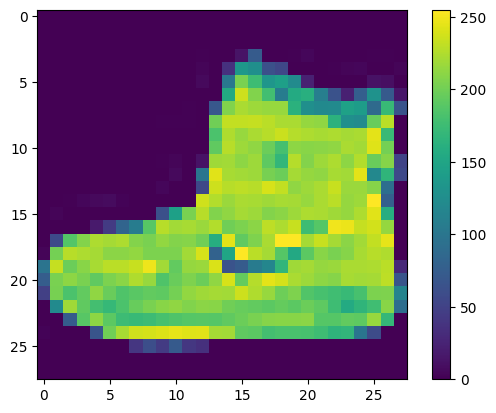

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

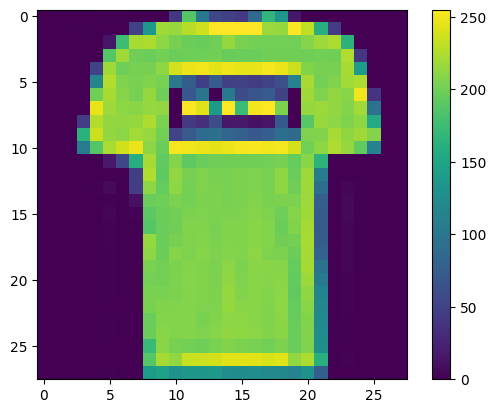

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values between 0 and 1 before passing them to the neural network model. To do this, divide the values by 255. It is important that the training sample and the validation sample are pre-processed in the same way:


In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.


To make sure that the data is in the correct format and that you are ready to build and train the network, let's display the first 25 images from the training set and display the class name under each image.

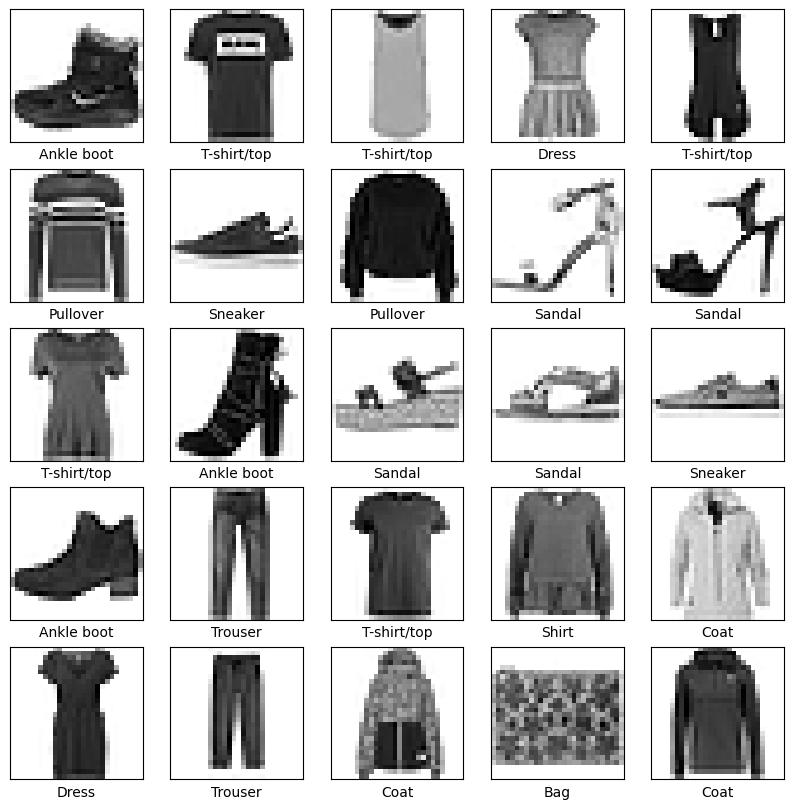

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # With the subplot() you can draw multiple plots in one figure:
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Build the model**

To build a neural network, you must configure the model layers and then compile the model.

# **Customizing layers**

The first layer in this network, **tf.keras.layers.Flatten** , converts the image format from a two-dimensional array (28 by 28 pixels) to a one-dimensional array (28 * 28 = 784 pixels). Think of this layer as separating rows of pixels in an image and aligning them. This layer has no parameters to explore; it only reformats the data.

Once the pixels are aligned, the network consists of a sequence of two layers **tf.keras.layers.Dense** . These are densely connected or fully connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns an array of logits of length 10. Each node contains a score indicating that the current image belongs to one of the 10 classes.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Compile the model**

https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

Before the model is ready to be trained, it needs a few more customizations. These are added during the compile phase of the model:

**Loss function** - measures how accurate the model is during training. You want to minimize this function to “steer” the model in the right direction. https://www.tensorflow.org/api_docs/python/tf/keras/losses


**Optimizer** - this is how the model is updated based on the data it sees and its loss function. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

**Metrics** - used to monitor the training and testing phases. The following example uses accuracy , the proportion of correctly classified images. https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#**Train the model**

**To train the neural network model, the following steps should be followed:**

1. Fit training data to the model. In this example, the training data is in train_images and train_labels .

2. The model learns to associate images and labels.

3. You ask the model to make predictions about the test set - in this example the test_images array .

4. Make sure that the predictions match the labels in the array test_labels .

#**Fit the model**

To start training, call the **model.fit method** , so named because it “fits” the model to the training data:
https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit




In [17]:
model.fit(train_images, train_labels,  batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9135 - loss: 0.2329
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9171 - loss: 0.2200
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9204 - loss: 0.2144
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9224 - loss: 0.2052
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9234 - loss: 0.2064
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9252 - loss: 0.1975
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9291 - loss: 0.1900
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9313 - loss: 0.1827
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9337 - loss: 0.1777
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9352 - loss: 0.1737


# **Score accuracy**
Then compare how the model performs with the test dataset:

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8928 - loss: 0.3450

Test accuracy: 0.892799973487854


It turns out that the accuracy on the test dataset is slightly less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting . Overfitting occurs when a machine learning model performs worse with new, previously unseen input data than with training data. The overfitted model “memorizes” noise and details in the training dataset to the point that it negatively affects the model's performance on the new data. For more information, see the following:


https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ru#demonstrate_overfitting


https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ru#strategies_to_prevent_overfitting

#**Making predictions**

The trained model can be used to make some image predictions. Attach a softmax layer to convert the model's linear outputs - logits - into probabilities, which should be easier to interpret.


In [19]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [21]:
predictions[0]

array([3.8610434e-10, 3.6978400e-11, 1.6029896e-11, 4.4793893e-19,
       1.2240081e-12, 2.5919859e-05, 3.5049715e-12, 1.9345880e-02,
       4.7363259e-11, 9.8062825e-01], dtype=float32)

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#**Check** **predictions**

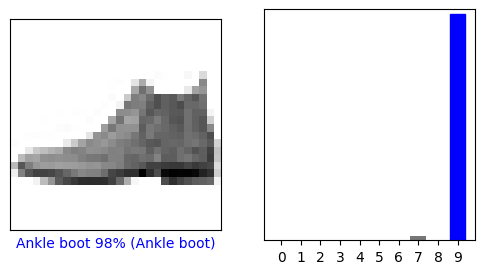

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

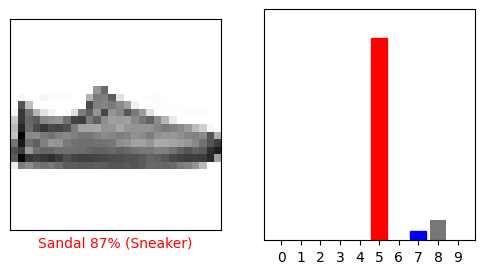

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

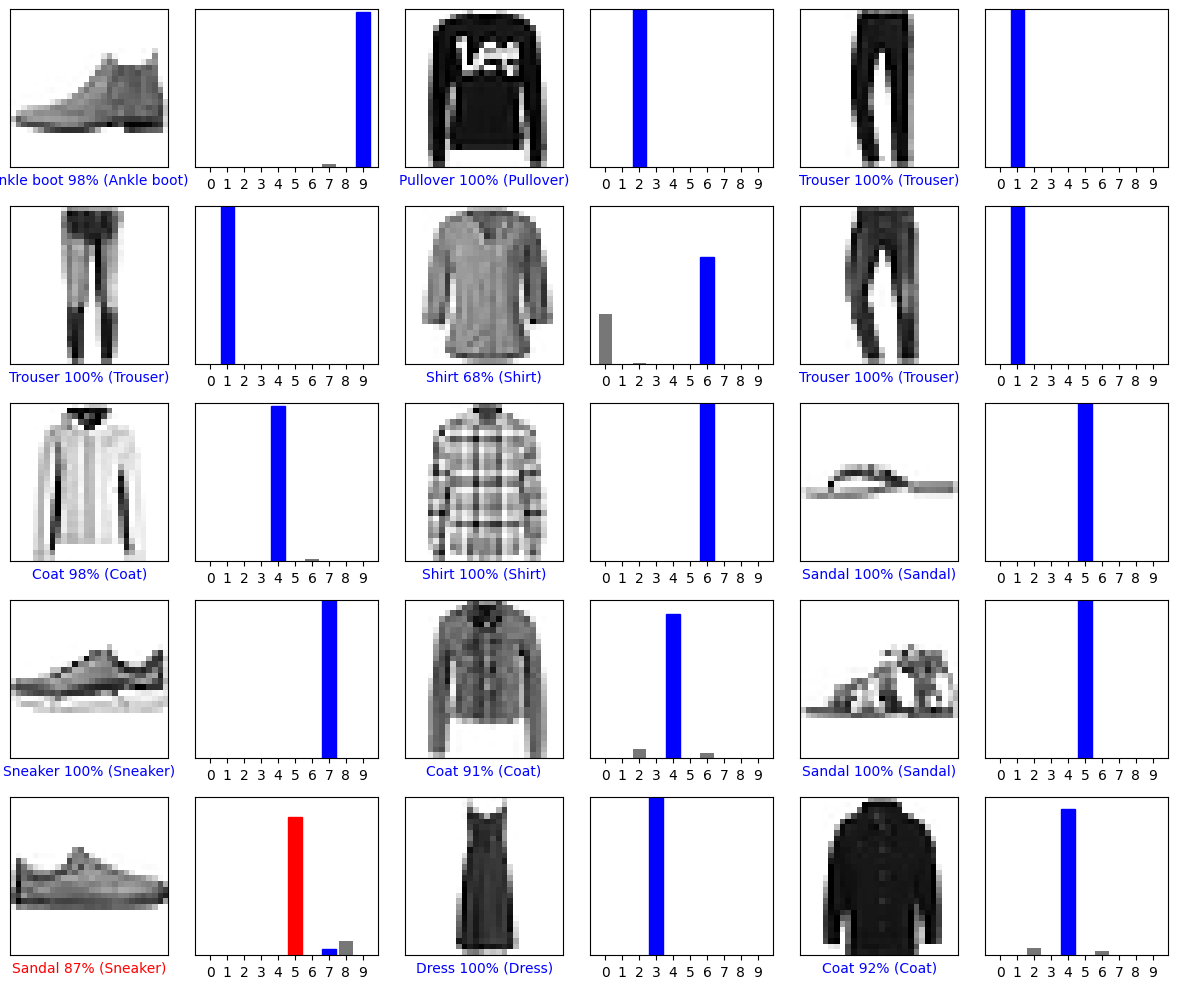

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Use a trained model**

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
 # Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[4.4007702e-05 5.8905915e-19 9.9987137e-01 5.6400175e-13 6.4891465e-05
  9.7700176e-20 1.9633788e-05 1.7998196e-21 3.0810149e-14 2.3474367e-19]]


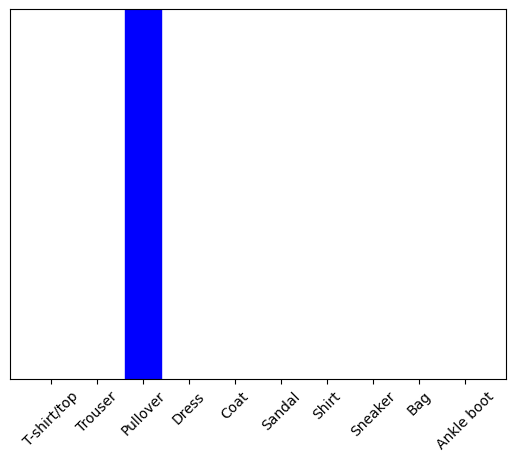

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2